### Analysis of the dependence of the degree distribution of networks generated from the Bianconi-Barabasi model on the fitness distribution

#### Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import pickle

import powerlaw
from scipy import stats
from scipy.stats import linregress

import sys
sys.path.insert(0, '../')
from src import model

#### General parameters

In [2]:
m = 2 # Number of links for new nodes
m0 = 3 # Initial number of nodes

In [3]:
# Initializing the networks
network_delta = model.network(m0, m)
network_uniform = model.network(m0, m)
network_exp = model.network(m0, m)

#### Generating networks

##### Delta fitness distribution

In [74]:
network_delta.set_fitness_distr('delta')
# Generate the network (50_000 nodes)
network_delta.generate_network(50_000)
# Write the graphs to a pickle file
with open('../data/model/graph_delta_50_000.pkl', 'wb') as fp:
    pickle.dump(network_delta.graph, fp)

In [40]:
# Generate the network (100_000 nodes)
network_delta.set_up(m0)
network_delta.generate_network(100_000)
# Write the graphs to a pickle file
with open('../data/model/graph_delta_100_000.pkl', 'wb') as fp:
    pickle.dump(network_delta.graph, fp)

##### Uniform fitness distribution

In [86]:
network_uniform.set_fitness_distr('uniform')
# Generate the network (50_000 nodes)
network_uniform.generate_network(50_000)
with open('../data/model/graph_uniform_50_000.pkl', 'wb') as fp:
    pickle.dump(network_uniform.graph, fp)

In [41]:
# Generate the network (100_000 nodes)
network_uniform.set_up(m0)
network_uniform.generate_network(100_000)
with open('../data/model/graph_uniform_100_000.pkl', 'wb') as fp:
    pickle.dump(network_uniform.graph, fp)

##### Exponential fitness distribution

In [ ]:
network_exp.set_fitness_distr('exponential')
# Generate the network (50_000 nodes)
network_exp.generate_network(50_000)
# Write the graphs to a pickle file
with open('../data/model/graph_exp_50_000.pkl', 'wb') as fp:
    pickle.dump(network_exp.graph, fp)

In [42]:
# Generate the network (100_000 nodes)
network_exp.set_up(m0)
network_exp.generate_network(100_000)
# Write the graphs to a pickle file
with open('../data/model/graph_exp_100_000.pkl', 'wb') as fp:
    pickle.dump(network_exp.graph, fp)

#### Analysis of the networks

##### Read in the graphs

In [4]:
# 50_000 nodese
with open('../data/model/graph_delta_50_000.pkl', 'rb') as fp:
    graph_delta_50 = pickle.load(fp)

with open('../data/model/graph_uniform_50_000.pkl', 'rb') as fp:
    graph_uniform_50 = pickle.load(fp)

with open('../data/model/graph_exp_50_000.pkl', 'rb') as fp:
    graph_exp_50 = pickle.load(fp)

##### Delta fitness distribution vs uniform fitness distribution

In [14]:
# Set the graph in the object to the graph from data
network_delta.set_graph(graph_delta_50)
network_uniform.set_graph(graph_uniform_50)

# Get the degree distribution of the network
p_k_delta, k_delta = network_delta.get_degree_distr()
p_k_uniform, k_uniform = network_uniform.get_degree_distr()

In [6]:
# Determine the power-law exponent of the degree distribution

# Remove zero probabilities
x_delta = np.delete(k_delta, np.argwhere(p_k_delta==0))
y_delta = np.delete(p_k_delta, np.argwhere(p_k_delta==0))
# Transform to log scale
x_log_delta = np.log10(x_delta)
y_log_delta = np.log10(y_delta)

# Linear regression (slope is the exponent)
slope_delta, intercept_delta, r_value_delta, _, _ = linregress(x_log_delta, y_log_delta)

# Regression line
y_fit_delta = 10**intercept_delta * x_delta**(slope_delta)
y_analytic_delta = x_delta**(-3)

print('The power law exponent of the degree distribution using a delta fitness distribution is %s'% np.round(-slope_delta, 3))


The power law exponent of the degree distribution using a delta fitness distribution is 2.869


In [7]:
# Determine the power-law exponent of the degree distribution

# Remove zero probabilities
x_uniform = np.delete(k_uniform, np.argwhere(p_k_uniform==0))
y_uniform = np.delete(p_k_uniform, np.argwhere(p_k_uniform==0))
# Transform to log scale
x_log_uniform = np.log10(x_uniform)
y_log_uniform = np.log10(y_uniform * x_log_uniform)

# Linear regression (slope is the exponent)
slope_uniform, intercept_uniform, r_value_uniform, _, _ = linregress(x_log_uniform, y_log_uniform)

# Regression line
y_fit_uniform = 10**intercept_uniform * (x_uniform**(slope_uniform) / x_log_uniform)
y_analytic_uniform = 10**-1 * x_uniform**(-2.255)

print('The power law exponent of the degree distribution using a uniform fitness distribution is %s'% np.round(-slope_uniform, 3))

The power law exponent of the degree distribution using a uniform fitness distribution is 2.254


In [8]:
# Node ID of the largest node
print('Largest node for Barabasi-Albert network: %s' %network_delta.get_largest_node())
print('Largest node for Bianconi-Barabasi network (uniform fitness): %s' %network_uniform.get_largest_node())

Largest node for Barabasi-Albert network: 0
Largest node for Bianconi-Barabasi network (uniform fitness): 6


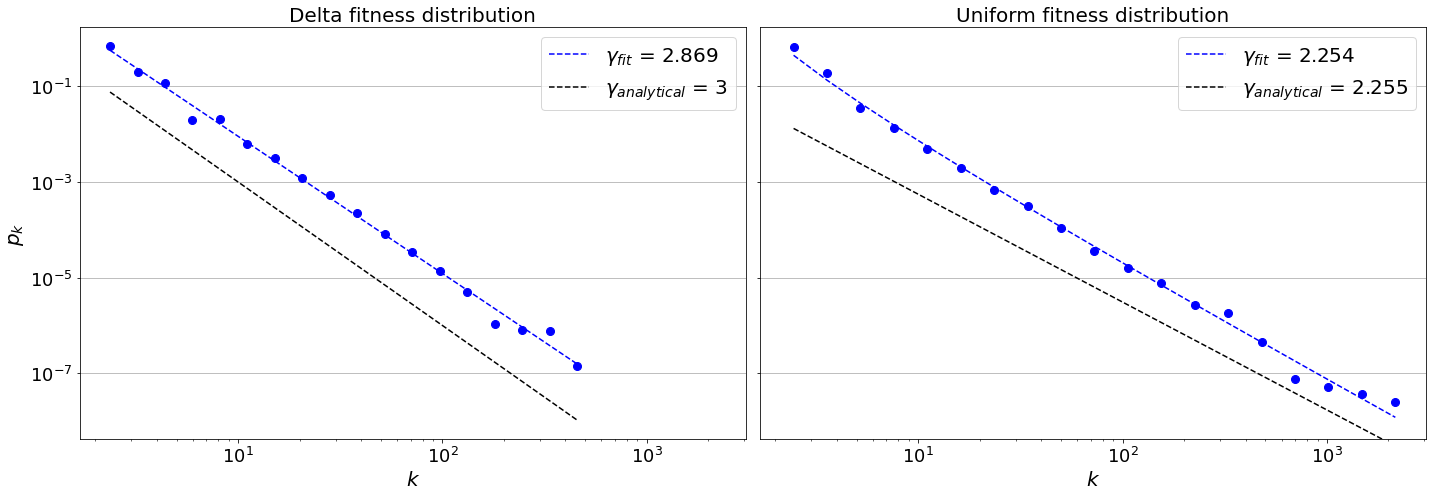

In [9]:
# Visualizing the degree distribution

fig, axs = plt.subplots(1,2, figsize = (20,7), sharex=True, sharey=True)

axs[0].tick_params(axis = 'both', labelsize = 18)
axs[1].tick_params(axis = 'both', labelsize = 18)

axs[0].set_title('Delta fitness distribution', fontsize=20)
axs[0].loglog(k_delta, p_k_delta, 'bo', markersize=8)
axs[0].loglog(x_delta, y_fit_delta, color = 'blue', linestyle = 'dashed', label = '$\gamma_{fit}$ = %s'%np.round(-slope_delta,3))
axs[0].loglog(x_delta, y_analytic_delta, color = 'black', linestyle = 'dashed', label = '$\gamma_{analytical}$ = 3')
axs[0].set_ylabel('$p_k$', fontsize=20)
axs[0].set_xlabel('$k$', fontsize=20)
axs[0].legend(fontsize = 20)

axs[1].set_title('Uniform fitness distribution', fontsize=20)
axs[1].loglog(k_uniform, p_k_uniform, 'bo', markersize=8)
axs[1].loglog(x_uniform, y_fit_uniform, color = 'blue', linestyle = 'dashed', label = '$\gamma_{fit}$ = %s'%np.round(-slope_uniform,3))
axs[1].loglog(x_uniform, y_analytic_uniform, color = 'black', linestyle = 'dashed', label = '$\gamma_{analytical}$ = 2.255')
axs[1].set_xlabel('$k$', fontsize=20)
axs[1].legend(fontsize = 20)

for ax in axs.flat:
    ax.yaxis.grid(True)

plt.tight_layout()
plt.savefig('../results/degree_delta_vs_uniform.png', dpi=300)
plt.show()

In [11]:
# Create gifs
network_delta.create_gif('../results/network_delta.gif', time_steps=200)
network_uniform.create_gif('../results/network_uniform.gif', time_steps=200)

##### Uniform fitness distribution vs exponential distribution

In [15]:
# Set the graph in the object to the graph from data
network_uniform.set_graph(graph_uniform_50)
network_exp.set_graph(graph_exp_50)

# Get the degree distribution of the network
p_k_uniform, k_uniform = network_uniform.get_degree_distr()
p_k_exp, k_exp = network_exp.get_degree_distr()

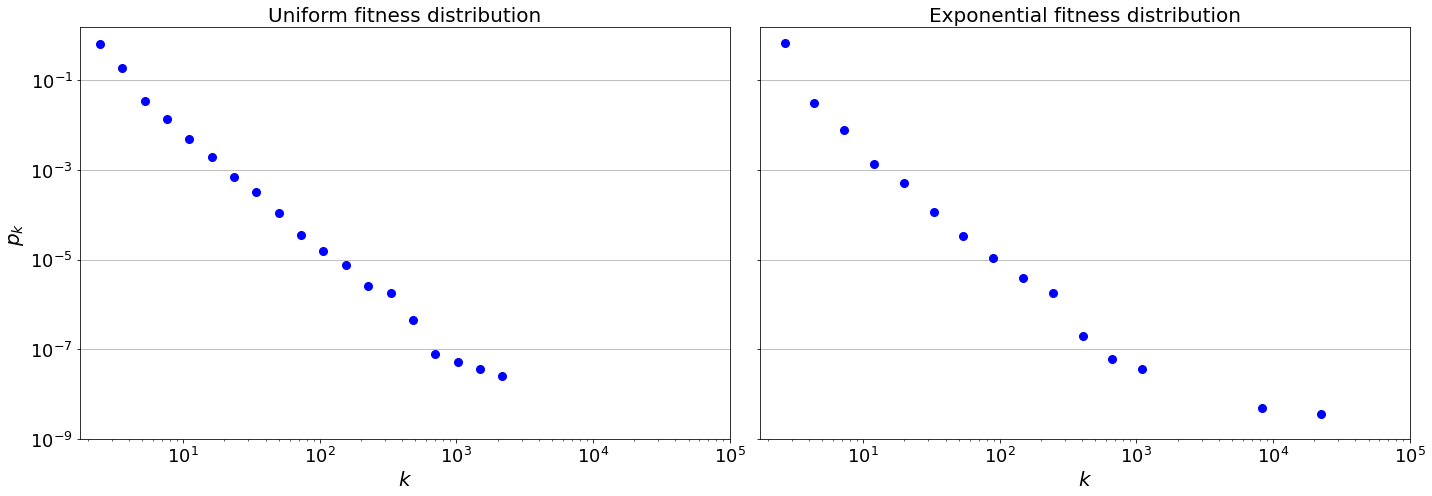

In [12]:
fig, axs = plt.subplots(1,2, figsize = (20,7), sharex=True, sharey=True)

axs[0].tick_params(axis = 'both', labelsize = 18)
axs[1].tick_params(axis = 'both', labelsize = 18)

axs[0].set_title('Uniform fitness distribution', fontsize=20)
axs[0].loglog(k_uniform, p_k_uniform, 'bo', markersize=8)
axs[0].set_ylabel('$p_k$', fontsize=20)
axs[0].set_xlabel('$k$', fontsize=20)
axs[0].set_ylim(bottom=1E-9)
axs[0].set_xlim(right=1E5)

axs[1].set_title('Exponential fitness distribution', fontsize=20)
axs[1].loglog(k_exp, p_k_exp, 'bo', markersize=8)
axs[1].set_xlabel('$k$', fontsize=20)

for ax in axs.flat:
    ax.yaxis.grid(True)

plt.tight_layout()
plt.savefig('../results/degree_uniform_vs_exp.png', dpi=300)
plt.show()

In [13]:
print('Largest node for Bianconi-Barabasi network (uniform fitness): %s' %network_uniform.get_largest_node())
print('Largest node for Bianconi-Barabasi network (exponential fitness): %s' %network_exp.get_largest_node())

Largest node for Bianconi-Barabasi network (uniform fitness): 6
Largest node for Bianconi-Barabasi network (exponential fitness): 18


In [13]:
network_exp.create_gif('../results/network_exp.gif', time_steps=200)

#### Comparison of properties of the networks

In [17]:
networks = [network_delta, network_uniform, network_exp]
distributions = ['delta', 'uniform', 'exponential']

# Properties to calculate
avg_path_lengths, avg_clusterings, clusterings = [], [], []
diameters, assortativities = [], []

for i, network in enumerate(networks):
    print('Fitness distribution:', distributions[i])
    G = network.convert_to_networkx(t = len(network.graph) - network.m0)

    avg_path_length = nx.average_shortest_path_length(G)
    avg_path_lengths.append(avg_path_length)
    print("Average path length:", avg_path_length)
    
    avg_clustering_coefficient = nx.average_clustering(G)
    avg_clusterings.append(avg_clustering_coefficient) 
    print("Average clustering coefficient before attack:", avg_clustering_coefficient) 

    # Calculate degree centrality
    degree_centrality = nx.degree_centrality(G)

    # Sort nodes by degree centrality in descending order
    sorted_nodes = sorted(degree_centrality, key=degree_centrality.get, reverse=True)

    # Print top 5 highly connected hubs
    print("Highly connected hubs:\n")
    for node in sorted_nodes[:5]:
        print("Node:", node, "Degree Centrality:", degree_centrality[node])
    
    r = nx.degree_assortativity_coefficient(G)
    print('\nAssortativity coefficient:', r)

    num_attacks = 10  # Number of hubs to remove
    removed_hubs = sorted_nodes[:num_attacks]

    print("\nInitial number of connected components:", nx.number_connected_components(G))

    # Remove the targeted hubs
    for hub in removed_hubs:
        G.remove_node(hub)

    print("\nNumber of connected components after attacks:", nx.number_connected_components(G))

    avg_clustering_coefficient = nx.average_clustering(G)
    clusterings.append(avg_clustering_coefficient) 
    print("Average clustering coefficient after attack:", avg_clustering_coefficient)
    print("\n")

Fitness distribution: delta
Average path length: 5.605119161583231
Average clustering coefficient before attack: 0.0015086237856918078
Highly connected hubs:

Node: 0 Degree Centrality: 0.014320286405728116
Node: 8 Degree Centrality: 0.008920178403568072
Node: 2 Degree Centrality: 0.007680153603072061
Node: 4 Degree Centrality: 0.007380147602952059
Node: 7 Degree Centrality: 0.006700134002680054

Assortativity coefficient: -0.024315008535326855

Initial number of connected components: 1

Number of connected components after attacks: 14
Average clustering coefficient after attack: 0.0006774142233156468


Fitness distribution: uniform
Average path length: 4.7170034736694735
Average clustering coefficient before attack: 0.010701461834195916
Highly connected hubs:

Node: 6 Degree Centrality: 0.05130102602052041
Node: 19 Degree Centrality: 0.049400988019760395
Node: 8 Degree Centrality: 0.030280605612112245
Node: 60 Degree Centrality: 0.021760435208704174
Node: 10 Degree Centrality: 0.01614

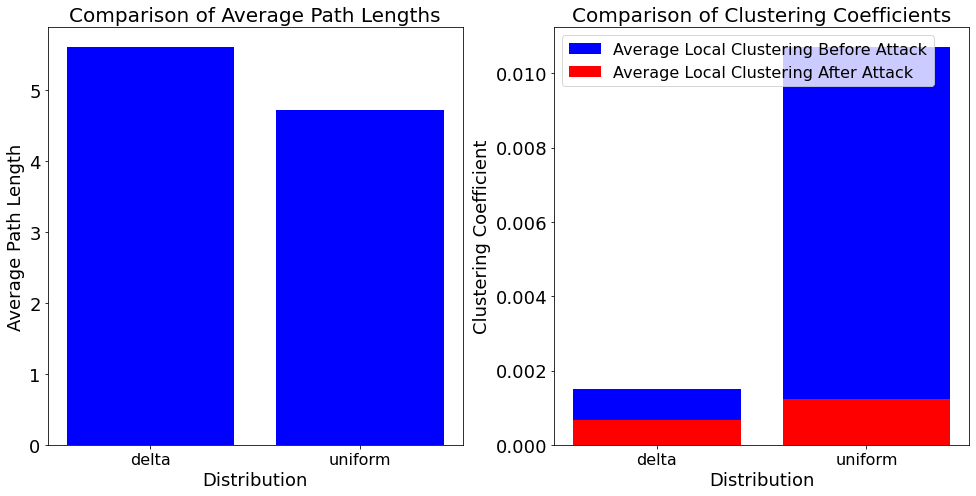

In [52]:
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
plt.bar(distributions[:2], avg_path_lengths[:2], color = 'blue')
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 18)
plt.xlabel('Distribution', fontsize = 18)
plt.ylabel('Average Path Length', fontsize = 18)
plt.title('Comparison of Average Path Lengths', fontsize = 20)

plt.subplot(1, 2, 2)
plt.bar(distributions[:2], avg_clusterings[:2], label='Average Local Clustering Before Attack', color = 'blue')
plt.bar(distributions[:2], clusterings[:2], label='Average Local Clustering After Attack', color = 'red')
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 18)
plt.xlabel('Distribution', fontsize = 18)
plt.ylabel('Clustering Coefficient', fontsize = 18)
plt.title('Comparison of Clustering Coefficients', fontsize = 20)
plt.legend(loc='upper left', fontsize = 16)
plt.tight_layout()
plt.savefig('../results/properties_delta_vs_uniform.png', dpi=300)
plt.show()

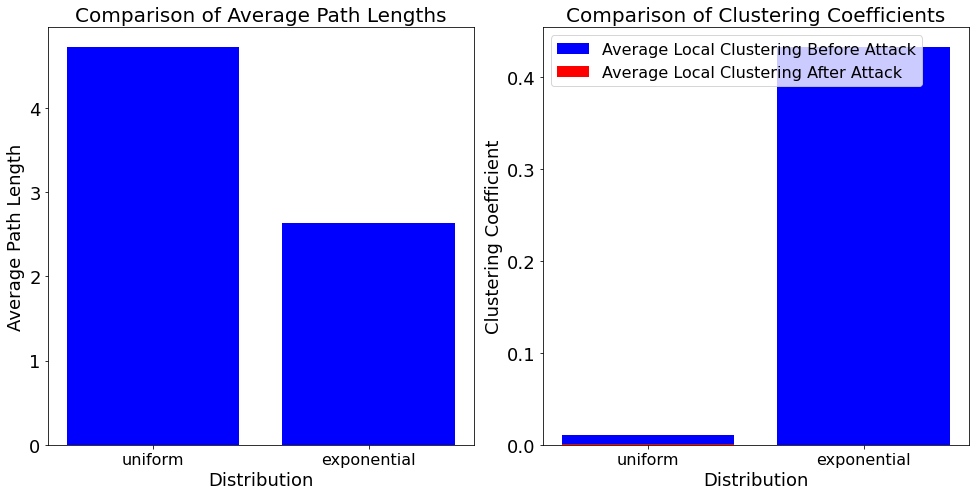

In [53]:
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
plt.bar(distributions[1:], avg_path_lengths[1:], color = 'blue')
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 18)
plt.xlabel('Distribution', fontsize = 18)
plt.ylabel('Average Path Length', fontsize = 18)
plt.title('Comparison of Average Path Lengths', fontsize = 20)

plt.subplot(1, 2, 2)
plt.bar(distributions[1:], avg_clusterings[1:], label='Average Local Clustering Before Attack', color = 'blue')
plt.bar(distributions[1:], clusterings[1:], label='Average Local Clustering After Attack', color = 'red')
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 18)
plt.xlabel('Distribution', fontsize = 18)
plt.ylabel('Clustering Coefficient', fontsize = 18)
plt.title('Comparison of Clustering Coefficients', fontsize = 20)
plt.legend(loc='upper left', fontsize = 16)
plt.tight_layout()
plt.savefig('../results/properties_uniform_vs_exp.png', dpi=300)
plt.show()

#### Compare properties with real network

In [54]:
# Average path length, clustering coefficient before and after attack from real network
# Values obtained from notebook with analysis of real network ('real_network.ipynb')
data_real_network = [3.570840431393606, 0.1766290303590772, 0.1262386628418399]

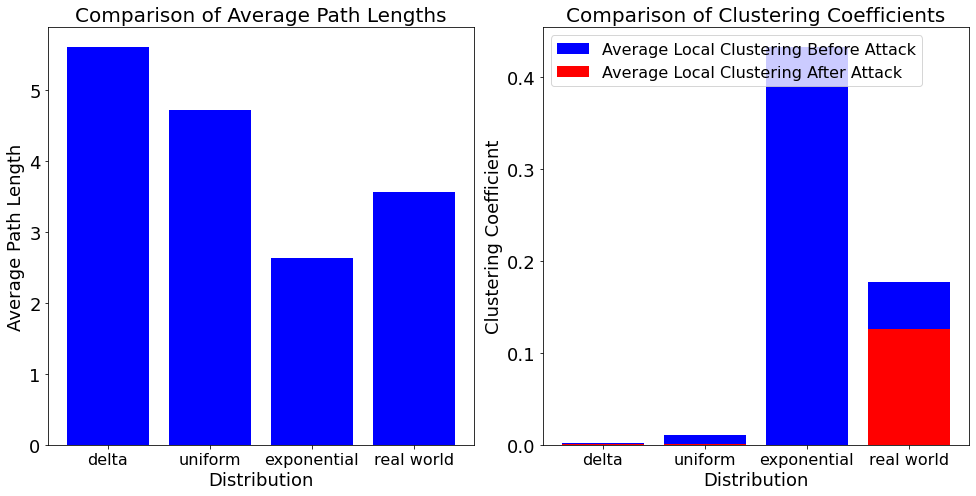

In [57]:
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
plt.bar(distributions, avg_path_lengths, color = 'blue')
plt.bar('real world', data_real_network[0], color = 'blue')
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 18)
plt.xlabel('Distribution', fontsize = 18)
plt.ylabel('Average Path Length', fontsize = 18)
plt.title('Comparison of Average Path Lengths', fontsize = 20)

plt.subplot(1, 2, 2)
plt.bar(distributions, avg_clusterings, label='Average Local Clustering Before Attack', color = 'blue')
plt.bar('real world', data_real_network[1], color = 'blue')
plt.bar(distributions, clusterings, label='Average Local Clustering After Attack', color = 'red')
plt.bar('real world', data_real_network[2], color = 'red')
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 18)
plt.xlabel('Distribution', fontsize = 18)
plt.ylabel('Clustering Coefficient', fontsize = 18)
plt.title('Comparison of Clustering Coefficients', fontsize = 20)
plt.legend(loc='upper left', fontsize = 16)
plt.tight_layout()
plt.savefig('../results/properties_real_network.png', dpi=300)
plt.show()

#### Statistical comparison of the type of degree distribution

In [58]:
# Delta
fit_powerlaw = powerlaw.Fit(p_k_delta)

comp_list = ['power_law', 'lognormal', 'exponential', 'lognormal_positive', 'truncated_power_law', 'stretched_exponential']

# Test for truncated power law
for distr in comp_list:
    if distr != 'truncated_power_law':
        R, p = fit_powerlaw.distribution_compare('truncated_power_law', distr, normalized_ratio=True)
        print('%s vs %s: R = %s, p = %s'%('truncated_power_law', distr, np.round(R,4), np.round(p,4)))

# Test for power law
for distr in comp_list:
    if distr != 'power_law':
        R, p = fit_powerlaw.distribution_compare('power_law', distr, normalized_ratio=True)
        print('%s vs %s: R = %s, p = %s'%('power_law', distr, np.round(R,4), np.round(p,4)))

# Test for stretched exponential
for distr in comp_list:
    if distr != 'stretched_exponential':
        R, p = fit_powerlaw.distribution_compare('stretched_exponential', distr, normalized_ratio=True)
        print('%s vs %s: R = %s, p = %s'%('strechted_exponential', distr, np.round(R,4), np.round(p,4)))

Calculating best minimal value for power law fit
truncated_power_law vs power_law: R = 1.6533, p = 0.0097
truncated_power_law vs lognormal: R = 2.0899, p = 0.0366
truncated_power_law vs exponential: R = 3.6583, p = 0.0003
truncated_power_law vs lognormal_positive: R = 643.4221, p = 0.0
truncated_power_law vs stretched_exponential: R = 1.7735, p = 0.0761
power_law vs lognormal: R = -0.9454, p = 0.3445
power_law vs exponential: R = 3.0434, p = 0.0023
power_law vs lognormal_positive: R = 583.1279, p = 0.0
power_law vs truncated_power_law: R = -1.6533, p = 0.0097
power_law vs stretched_exponential: R = -1.0447, p = 0.2961
strechted_exponential vs power_law: R = 1.0447, p = 0.2961
strechted_exponential vs lognormal: R = 1.2975, p = 0.1945
strechted_exponential vs exponential: R = 3.589, p = 0.0
strechted_exponential vs lognormal_positive: R = 638.3565, p = 0.0
strechted_exponential vs truncated_power_law: R = -1.7735, p = 0.0761


Values less than or equal to 0 in data. Throwing out 0 or negative values
Assuming nested distributions
No valid fits found.
Assuming nested distributions
Assuming nested distributions


In [59]:
# Uniform
fit_powerlaw = powerlaw.Fit(p_k_uniform)

# Test for truncated power law
for distr in comp_list:
    if distr != 'truncated_power_law':
        R, p = fit_powerlaw.distribution_compare('truncated_power_law', distr, normalized_ratio=True)
        print('%s vs %s: R = %s, p = %s'%('truncated_power_law', distr, np.round(R,4), np.round(p,4)))

# Test for power law
for distr in comp_list:
    if distr != 'power_law':
        R, p = fit_powerlaw.distribution_compare('power_law', distr, normalized_ratio=True)
        print('%s vs %s: R = %s, p = %s'%('power_law', distr, np.round(R,4), np.round(p,4)))

# Test for stretched exponential
for distr in comp_list:
    if distr != 'stretched_exponential':
        R, p = fit_powerlaw.distribution_compare('stretched_exponential', distr, normalized_ratio=True)
        print('%s vs %s: R = %s, p = %s'%('strechted_exponential', distr, np.round(R,4), np.round(p,4)))

Calculating best minimal value for power law fit
truncated_power_law vs power_law: R = 1.7093, p = 0.0147
truncated_power_law vs lognormal: R = 1.1569, p = 0.2473
truncated_power_law vs exponential: R = 3.8789, p = 0.0001
truncated_power_law vs lognormal_positive: R = 621.8906, p = 0.0
truncated_power_law vs stretched_exponential: R = 0.9225, p = 0.3563
power_law vs lognormal: R = -1.1903, p = 0.2339
power_law vs exponential: R = 3.2549, p = 0.0011
power_law vs lognormal_positive: R = 567.0171, p = 0.0
power_law vs truncated_power_law: R = -1.7093, p = 0.0147
power_law vs stretched_exponential: R = -1.284, p = 0.1991
strechted_exponential vs power_law: R = 1.284, p = 0.1991
strechted_exponential vs lognormal: R = 1.1932, p = 0.2328
strechted_exponential vs exponential: R = 3.8522, p = 0.0
strechted_exponential vs lognormal_positive: R = 614.8755, p = 0.0
strechted_exponential vs truncated_power_law: R = -0.9225, p = 0.3563


Assuming nested distributions
No valid fits found.
Assuming nested distributions
Assuming nested distributions


In [60]:
# Exponential
fit_powerlaw = powerlaw.Fit(p_k_exp)

# Test for truncated power law
for distr in comp_list:
    if distr != 'truncated_power_law':
        R, p = fit_powerlaw.distribution_compare('truncated_power_law', distr, normalized_ratio=True)
        print('%s vs %s: R = %s, p = %s'%('truncated_power_law', distr, np.round(R,4), np.round(p,4)))

# Test for power law
for distr in comp_list:
    if distr != 'power_law':
        R, p = fit_powerlaw.distribution_compare('power_law', distr, normalized_ratio=True)
        print('%s vs %s: R = %s, p = %s'%('power_law', distr, np.round(R,4), np.round(p,4)))

# Test for stretched exponential
for distr in comp_list:
    if distr != 'stretched_exponential':
        R, p = fit_powerlaw.distribution_compare('stretched_exponential', distr, normalized_ratio=True)
        print('%s vs %s: R = %s, p = %s'%('strechted_exponential', distr, np.round(R,4), np.round(p,4)))

Calculating best minimal value for power law fit
truncated_power_law vs power_law: R = 1.0877, p = 0.1441
truncated_power_law vs lognormal: R = 1.1135, p = 0.2655
truncated_power_law vs exponential: R = 3.6457, p = 0.0003
truncated_power_law vs lognormal_positive: R = 512.1677, p = 0.0
truncated_power_law vs stretched_exponential: R = 0.9372, p = 0.3486
power_law vs lognormal: R = -0.6012, p = 0.5477
power_law vs exponential: R = 3.2553, p = 0.0011
power_law vs lognormal_positive: R = 479.4889, p = 0.0
power_law vs truncated_power_law: R = -1.0877, p = 0.1441
power_law vs stretched_exponential: R = -0.6505, p = 0.5154
strechted_exponential vs power_law: R = 0.6505, p = 0.5154
strechted_exponential vs lognormal: R = 0.8009, p = 0.4232
strechted_exponential vs exponential: R = 3.6279, p = 0.0
strechted_exponential vs lognormal_positive: R = 505.9862, p = 0.0
strechted_exponential vs truncated_power_law: R = -0.9372, p = 0.3486


Values less than or equal to 0 in data. Throwing out 0 or negative values
Assuming nested distributions
No valid fits found.
Assuming nested distributions
Assuming nested distributions
